In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [6]:
path = r"C:\Users\RabahDjennane\OneDrive - Sopex London Ltd\Shared\22.Databasis\1_Input\5_Freight\Freight.xlsx"

# Load Excel file object
xls = pd.ExcelFile(path)

# List all sheet names
print(xls.sheet_names)



['Sheet1', 'Sheet2', 'Sheet2 (2)', 'Handy_size', 'Fixed', 'Handy_size_copy']


In [ ]:
freight = pd.read_excel(path, sheet_name='Handy_size_copy', skiprows=1)

display(freight.tail())

print(freight.info())

,Unnamed: 0,HS1_38 A0-BAL,HS2_38 A0-BAL,HS3_38 A0-BAL,HS4_38 A0-BAL,HS5_38 A0-BAL,HS6_38 A0-BAL,HS7_38 A0-BAL
517,2026-01-09,7386.0,9093.0,16567.0,15743.0,10031.0,9569.0,8781.0
518,2026-01-16,6925.0,8493.0,16669.0,15257.0,9875.0,9231.0,8388.0
519,2026-01-23,6936.0,8429.0,17239.0,16079.0,10031.0,9313.0,8388.0
520,2026-01-30,7100.0,8554.0,18000.0,16743.0,10138.0,9500.0,8969.0
521,2026-02-06,7200.0,8607.0,18961.0,18100.0,10100.0,9569.0,9019.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     522 non-null    datetime64[ns]
 1   HS1_38 A0-BAL  409 non-null    float64       
 2   HS2_38 A0-BAL  409 non-null    float64       
 3   HS3_38 A0-BAL  409 non-null    float64       
 4   HS4_38 A0-BAL  409 non-null    float64       
 5   HS5_38 A0-BAL  409 non-null    float64       
 6   HS6_38 A0-BAL  409 non-null    float64       
 7   HS7_38 A0-BAL  409 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 32.8 KB
None


In [9]:
freight_copy=freight.copy()

In [23]:
freight_clean = freight_copy.dropna()

display(freight_clean.tail())

display(freight_clean.info())


# Create date string in YYYYMMDD format
date_str = datetime.today().strftime("%Y%m%d")

# Build output path with date in filename
output_path = fr"C:\Users\RabahDjennane\OneDrive - Sopex London Ltd\Shared\22.Databasis\2_output\6_freight\freight_clean_{date_str}.xlsx"

# Save to Excel
freight_clean.to_excel(output_path, index=False, engine="openpyxl")



,Unnamed: 0,HS1_38 A0-BAL,HS2_38 A0-BAL,HS3_38 A0-BAL,HS4_38 A0-BAL,HS5_38 A0-BAL,HS6_38 A0-BAL,HS7_38 A0-BAL
517,2026-01-09,7386.0,9093.0,16567.0,15743.0,10031.0,9569.0,8781.0
518,2026-01-16,6925.0,8493.0,16669.0,15257.0,9875.0,9231.0,8388.0
519,2026-01-23,6936.0,8429.0,17239.0,16079.0,10031.0,9313.0,8388.0
520,2026-01-30,7100.0,8554.0,18000.0,16743.0,10138.0,9500.0,8969.0
521,2026-02-06,7200.0,8607.0,18961.0,18100.0,10100.0,9569.0,9019.0


<class 'pandas.core.frame.DataFrame'>
Index: 409 entries, 109 to 521
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     409 non-null    datetime64[ns]
 1   HS1_38 A0-BAL  409 non-null    float64       
 2   HS2_38 A0-BAL  409 non-null    float64       
 3   HS3_38 A0-BAL  409 non-null    float64       
 4   HS4_38 A0-BAL  409 non-null    float64       
 5   HS5_38 A0-BAL  409 non-null    float64       
 6   HS6_38 A0-BAL  409 non-null    float64       
 7   HS7_38 A0-BAL  409 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 28.8 KB


None

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Rename date column
freight_clean = freight_clean.rename(columns={"Unnamed: 0": "Date"})

# Set as index
freight_clean = freight_clean.set_index("Date")

# Sort index
freight_clean = freight_clean.sort_index()

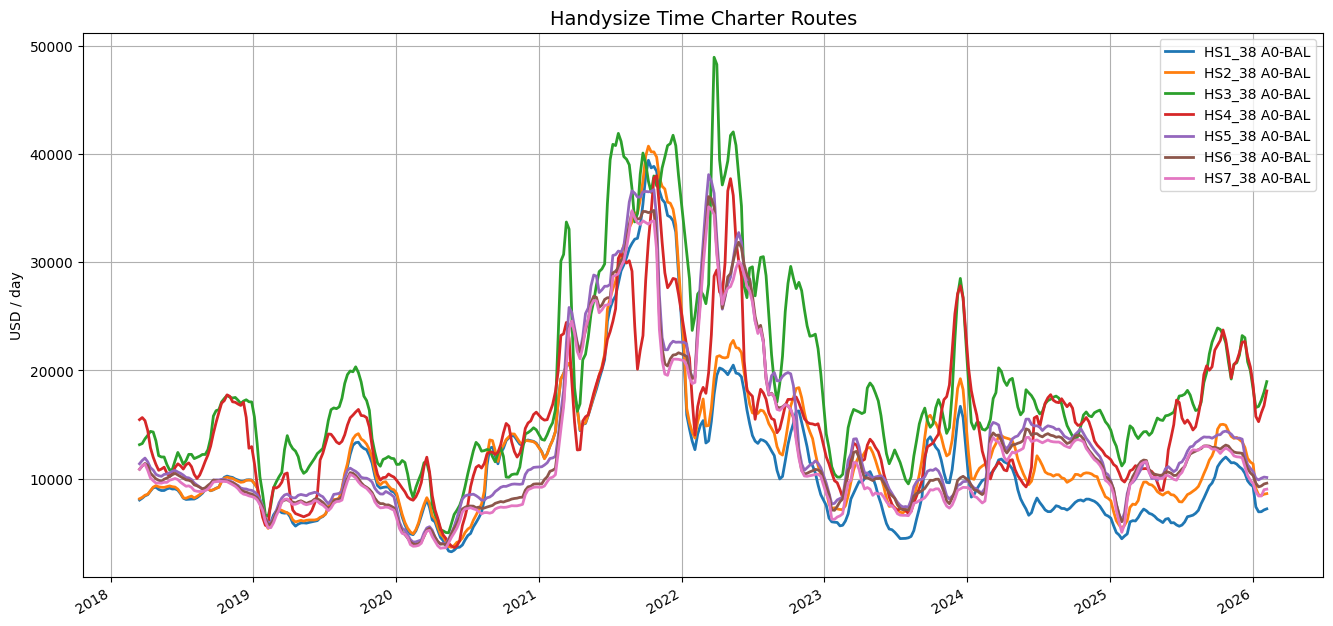

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))

freight_clean.plot(
    ax=ax,
    linewidth=2
)

ax.set_title("Handysize Time Charter Routes", fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("USD / day")

ax.grid(True)

plt.show()

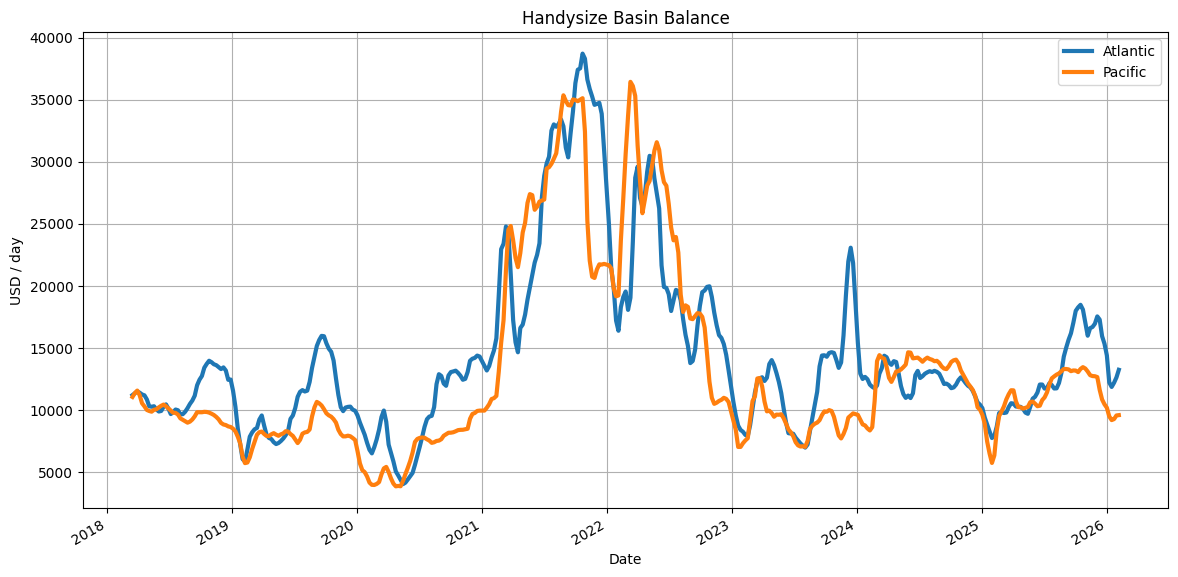

In [14]:
atlantic = ["HS1_38 A0-BAL", "HS2_38 A0-BAL", "HS3_38 A0-BAL", "HS4_38 A0-BAL"]
pacific  = ["HS5_38 A0-BAL", "HS6_38 A0-BAL", "HS7_38 A0-BAL"]

fig, ax = plt.subplots(figsize=(14, 7))

freight_clean[atlantic].mean(axis=1).plot(ax=ax, label="Atlantic", linewidth=3)
freight_clean[pacific].mean(axis=1).plot(ax=ax, label="Pacific", linewidth=3)

ax.set_title("Handysize Basin Balance")
ax.set_ylabel("USD / day")

ax.legend()
ax.grid(True)

plt.show()


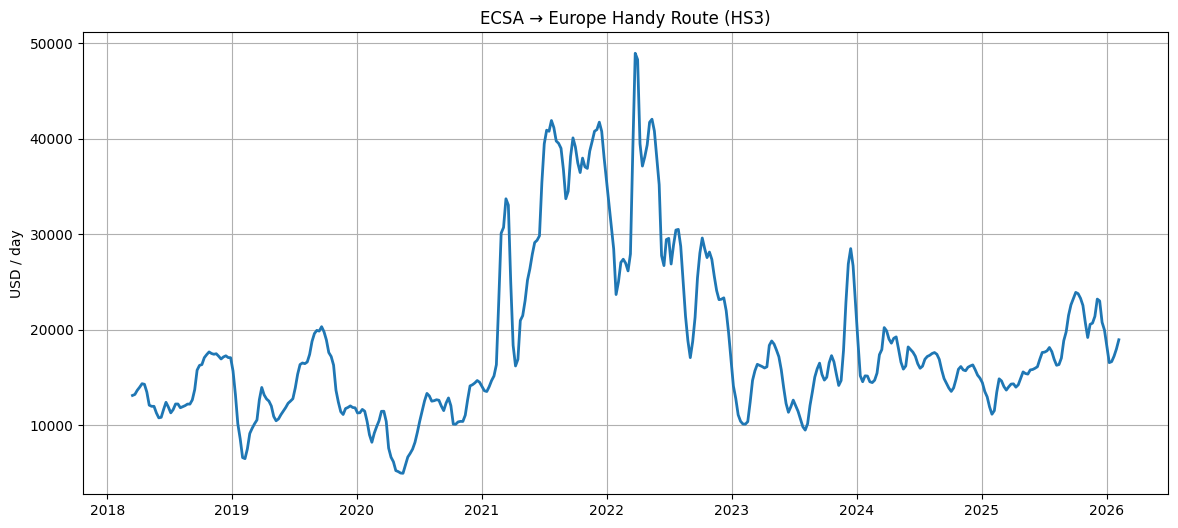

In [15]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(
    freight_clean.index,
    freight_clean["HS3_38 A0-BAL"],
    linewidth=2
)

ax.set_title("ECSA → Europe Handy Route (HS3)")
ax.set_ylabel("USD / day")
ax.grid(True)

plt.show()


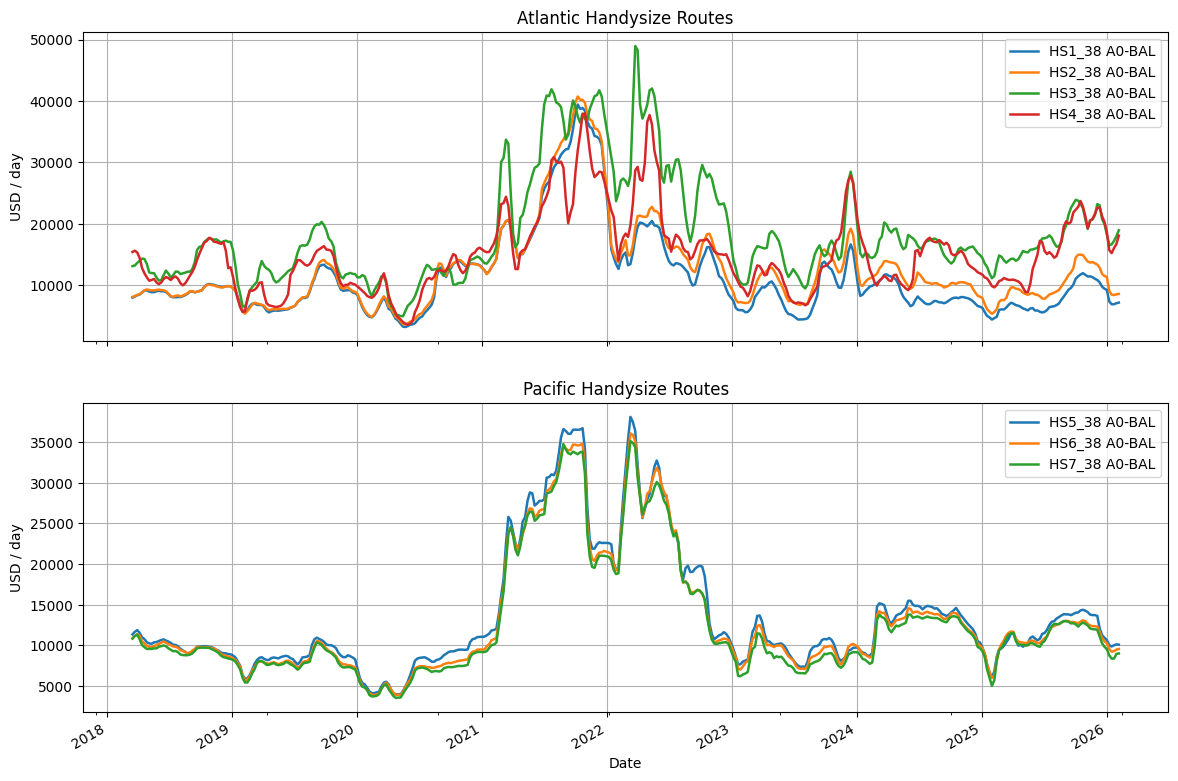

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Atlantic routes
freight_clean[atlantic].plot(ax=ax[0],linewidth=1.8)

ax[0].set_title("Atlantic Handysize Routes")
ax[0].set_ylabel("USD / day")
ax[0].grid(True)

# Pacific routes
freight_clean[pacific].plot(ax=ax[1],linewidth=1.8)

ax[1].set_title("Pacific Handysize Routes")
ax[1].set_ylabel("USD / day")
ax[1].grid(True)

plt.show()



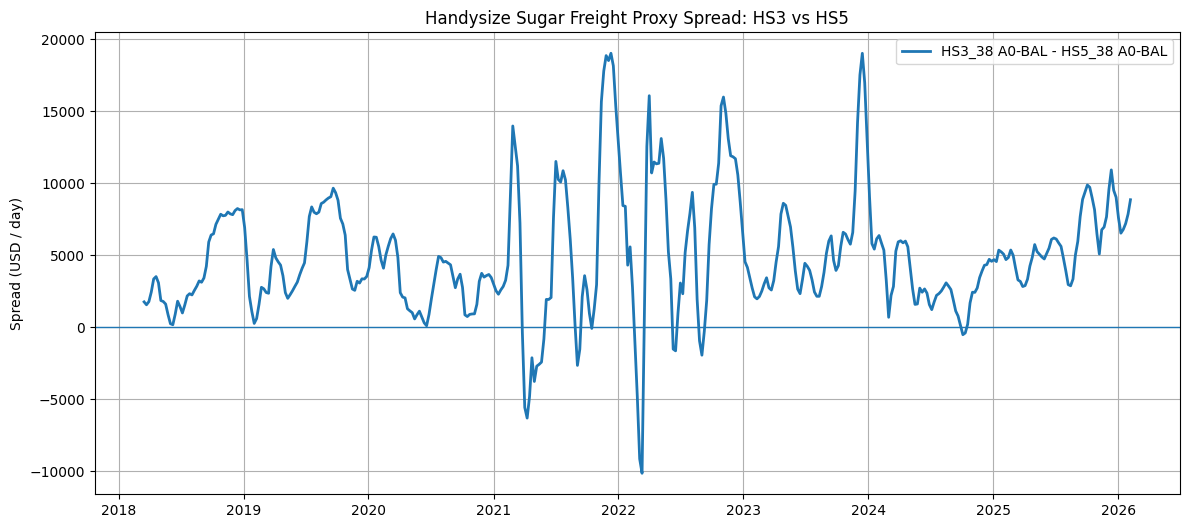

In [18]:
import matplotlib.pyplot as plt

# Make sure Date is index
if "Date" in freight_clean.columns:
    freight_clean = freight_clean.set_index("Date").sort_index()

hs3 = "HS3_38 A0-BAL"  # ECSA -> Skaw-Passero (proxy Brazil -> Europe)
hs5 = "HS5_38 A0-BAL"  # SE Asia trip (proxy IO/Asia tightness)

# Spread: HS3 - HS5 (USD/day)
spread = freight_clean[hs3] - freight_clean[hs5]

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(spread.index, spread, linewidth=2, label=f"{hs3} - {hs5}")

ax.axhline(0, linewidth=1)  # zero line
ax.set_title("Handysize Sugar Freight Proxy Spread: HS3 vs HS5")
ax.set_ylabel("Spread (USD / day)")
ax.legend()
ax.grid(True)

plt.show()


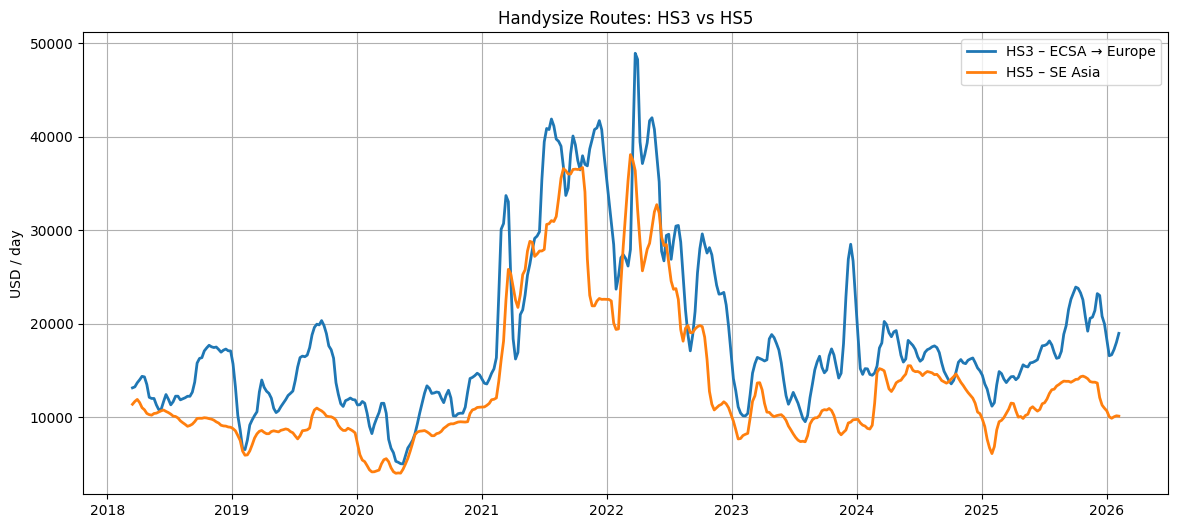

In [19]:
import matplotlib.pyplot as plt

# Ensure Date index
if "Date" in freight_clean.columns:
    freight_clean = freight_clean.set_index("Date").sort_index()

hs3 = "HS3_38 A0-BAL"
hs5 = "HS5_38 A0-BAL"

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(
    freight_clean.index,
    freight_clean[hs3],
    linewidth=2,
    label="HS3 – ECSA → Europe"
)

ax.plot(
    freight_clean.index,
    freight_clean[hs5],
    linewidth=2,
    label="HS5 – SE Asia"
)

ax.set_title("Handysize Routes: HS3 vs HS5")
ax.set_ylabel("USD / day")

ax.legend()
ax.grid(True)

plt.show()
